# Logistic Regression Project

Your many hours of hard time spent studying have landed you with the very important job of determining whether or not a user with some given data is likely to click on an advertisement or not on some website. A dataset of existing users who have already clicked or not clicked on an advertisement is provided.

The data set contains these features:

| Feature | Description |
| ------- | ----------- |
| Daily Time Spent on Site | How many minutes are spent on the site on average. |
| Age | Age of the user in years. |
| Area Income | The average income of the geographical region that the user is from. |
| Daily Internet Usage | Average minutes per day the user is online. |
| Ad Topic Line | The obnoxious text that appears on the advertisement. |
| City | The city that the user accesses the site from |
| Male | Whether or not the user is male. `0` for no, `1` for yes. |
| Country | The country from which the user accesses the website. |
| Timestamp | The time at which the user was presented the advertisement. |
| Clicked on Ad | Whether the user did (`1`) or did not (`0`) click on the advertisement. |

## Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

%matplotlib inline
sns.set_style('whitegrid')

## Data

The data set is already in this directory as `ads.csv`. It used to be `advertising.csv`, but for some reason Jupyter was refusing any operation on any kind of file merely containing the string "advertising" in the file name. Weird.

Anyway, put the data into a pandas `DataFrame` object and print some summary information.

In [27]:
data = pd.read_csv('ads.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [29]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [30]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Poking Around the Data

I strongly suspect the column `Ad Topic Line` is completely random and thus could not possibly contain any useful information.

First, see how many unique values there are.

In [31]:
data['Ad Topic Line'].nunique()

1000

The column does indeed appear to be random garbage, so it can be dropped without consequence.

In [32]:
data.drop(['Ad Topic Line'], axis=1, inplace=True)

How usefull is the `Country` column? There aren't 1,000 unique values available if real country names are being used. But let's see how many there being used here. Using the `.nunique()` method on the whole dataframe at once is more practical than using it on single columns.

In [34]:
ad_data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

The `City` column is definitely useless garbage since there are quite nearlt 1,000 unique values. The `Country` column just might be salvageable, but it depends on if the counts are evenly distributed or not.

(-0.5, 236.5, 0.0, 9.45)

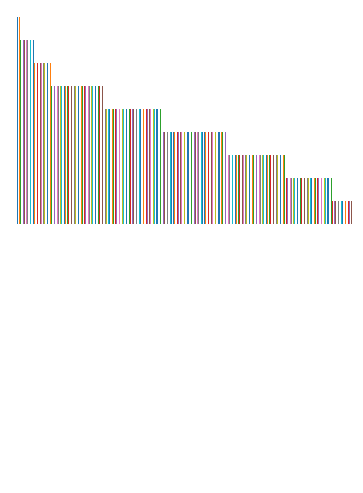

In [53]:
data['Country'].value_counts().plot(kind='bar')
plt.axis('off')

This looks pretty bad. But let's try a proper test of normality before we throw it out.

In [57]:
scipy.stats.mstats.normaltest(data['Country'].value_counts().values)

NormaltestResult(statistic=6.837479866987993, pvalue=0.03275368076339981)

This is clearly not useful data, so we can drop both the `City` and `Country` columns.

In [58]:
data.drop(['City', 'Country'], axis=1, inplace=True)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


What kind of insight can a pairplot give us about the other columns?

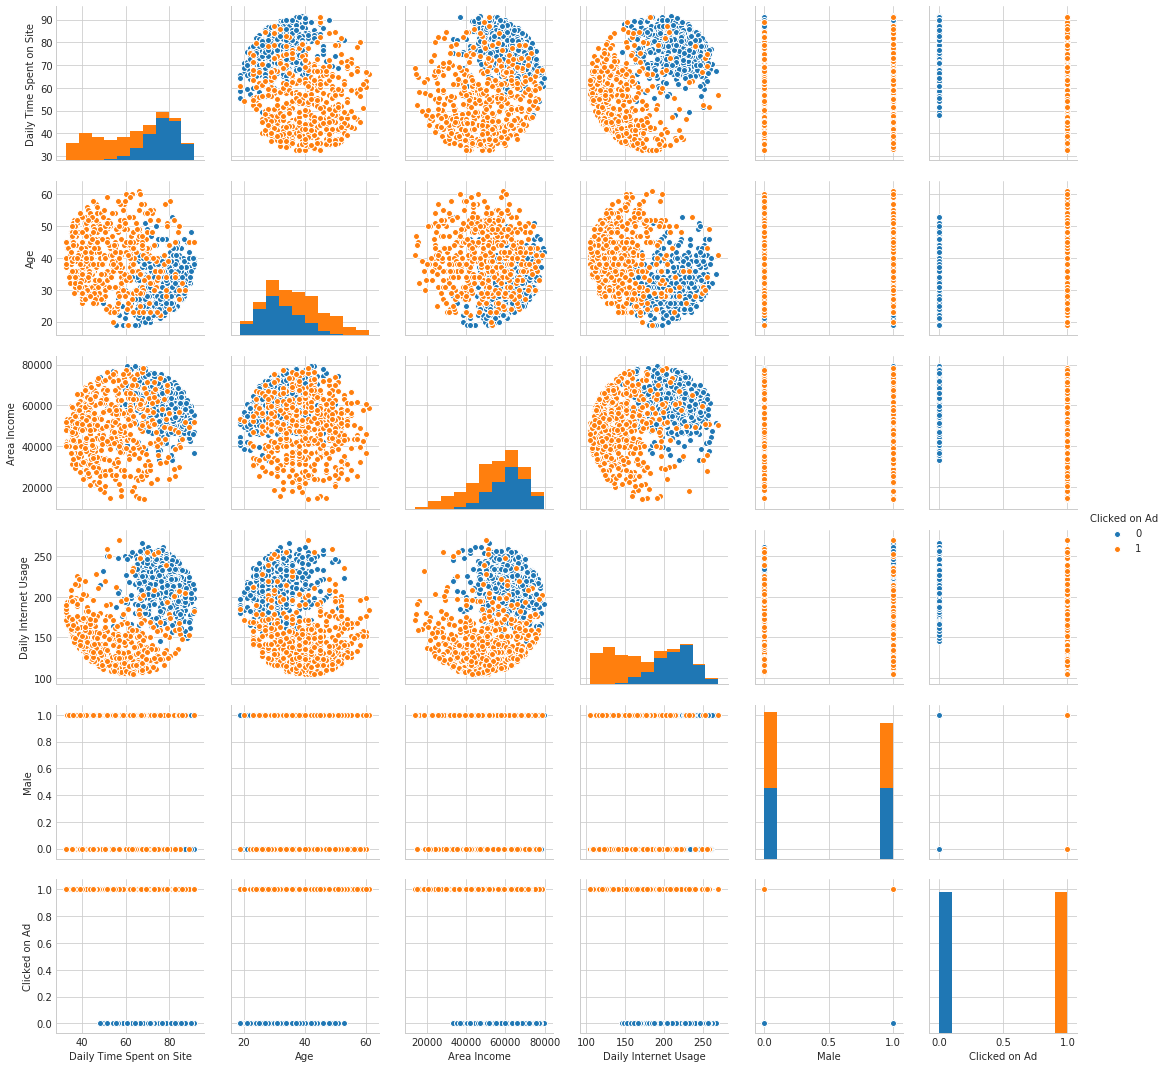

In [60]:
sns.pairplot(data=data, hue='Clicked on Ad')

I know this is randomly-generated data, but come on. Anyway, nearly all of the remaining features have some pretty stark differences visible, so let's move onward.